# Assignment 8

### GOAL
After Assignment 8, you should understand and be able to apply the following functions (in addition to the ones from the previous assignments):
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_pickle.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html (new: stratify parameter)
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_pickle.html

## Exercises 

***Ex1.*** Load the **pickle** file "titanic.pickle" and store it in a dataframe named titanic

In [32]:
import pandas as pd
titanic = pd.read_pickle('titanic.pickle')

***Ex2.*** Use scipy to measure the entropy given that the target variable is 'alive' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html). Don't forget to use a base 2. 

In [182]:
from scipy.stats import entropy
entropy(titanic['alive'].value_counts(), base=2)

0.9607079018756469

In [181]:
titanic['alive'].value_counts(normalize=True)

no     0.616162
yes    0.383838
Name: alive, dtype: float64

***Ex3.*** Measure the entropy from ex2 "by hand"; i.e., using math.log(). Again, don't forget to use a base 2. 

In [184]:
class_distribution

[0.6161616161616161, 0.3838383838383838]

In [186]:
import math
class_distribution = titanic['alive'].value_counts(normalize=True).tolist()
sum_entropy = 0
for c in class_distribution:
    print (c)
    sum_entropy +=  (c*math.log(c,2))
    
initial_entropy = -sum_entropy
initial_entropy

0.6161616161616161
0.3838383838383838


0.9607079018756469

In [39]:
#A more compact way using list comprehension. 
class_distribution = titanic['alive'].value_counts(normalize=True).tolist()
initial_entropy = -sum(c*math.log(c,2) for c in class_distribution)
initial_entropy

0.9607079018756469

FYI: calculating the entropy without using pandas as described in [1]
![Entropy calculation](https://i.ibb.co/Ptd9sLH/Screen-Shot-2021-09-23-at-3-44-02-PM.png)

[1]: P. Harrington, Machine Learning in Action, Manning  Publications Co, ISBN 9781617290183, 2012.

***Ex4.*** Let's split the dataset into 2 using the feature 'alone'. What are the resulting two entropies? Then, calculate the weighted average of these two entropies. The target variable is still 'alive'. Feel free to use scipy or to calculate the entropy by hand. 

In [187]:
titanic['alone'].value_counts(normalize=True)

True     0.602694
False    0.397306
Name: alone, dtype: float64

In [191]:
from scipy.stats import entropy
entropies = []
for value, ratio in titanic['alone'].value_counts(normalize=True).to_dict().items():    
    local_entropy = entropy(titanic.loc[titanic['alone']==value,'alive'].value_counts(), base=2)
    #print('local entropy:', value, local_entropy)
    print (value, ratio, local_entropy, local_entropy*ratio)
    entropies.append(local_entropy*ratio) 

print ('list at the end of the loop ', entropies)
new_global_entropy = sum(entropies)
print ('new global entropy:', new_global_entropy)

True 0.6026936026936027 0.8855730319190408 0.5337292010555835
False 0.39730639730639733 0.999907898385372 0.3972698047457034
list at the end of the loop  [0.5337292010555835, 0.3972698047457034]
new global entropy: 0.9309990058012869


***Ex5.*** Use the entropy from Ex3 and Ex4 to measure the resulting information gain

In [58]:
information_gain = initial_entropy - new_global_entropy
information_gain

0.029708896074360003

***Ex6.*** Looking at the decision tree introduced in '3_practice',  can you spot and explain the 4 ways that exist to end the recursion? 

In [9]:
def foo():
    # When to stop expanding the tree? There are several cases:
    # (1) When we have less than 5 number of observations (not enough information to draw conclusion)
    if self.target.shape[0]<5:
        return

    # (2) When we only have one value (or less) for the target
    if self.target.nunique()<=1:
        return

    # (3) When there are no more features (remember that we filtered them out above)
    if self.features.shape[1]==0:
        return

    # (4) When we reach the max depth
    if self.depth>self.max_depth:
        return

***Ex7.*** Load the data from 'cancer.csv' in a variable called cancer. Set the index to be the column 'id' (never use an index as a feature)

In [192]:
cancer = pd.read_csv('cancer.csv').set_index('id')
cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


***Ex8.*** Split the dataset into two parts using a random stratified sampling: (1) training 80%, (2) testing 20%. (see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). How can you 'spot' that it was indeed a stratified sampling?

In [232]:
from sklearn.model_selection import train_test_split

t = 'diagnosis'
cancer[t]
training, testing = train_test_split(cancer, test_size=.2, stratify=cancer[t], random_state=1) 

# A stratified sampling forces the distribution of the class to be very close, as shown below
print (training[t].value_counts(normalize=True).to_dict())
print (testing[t].value_counts(normalize=True).to_dict())
training

{'B': 0.6263736263736264, 'M': 0.37362637362637363}
{'B': 0.631578947368421, 'M': 0.3684210526315789}


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
875878,B,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,...,13.88,22.00,90.81,600.6,0.10970,0.1506,0.1764,0.08235,0.3024,0.06949
925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.20,706.7,0.12410,0.2264,0.1326,0.10480,0.2250,0.08321
922297,B,13.87,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,0.1620,...,15.05,24.75,99.17,688.6,0.12640,0.2037,0.1377,0.06845,0.2249,0.08492
914333,B,14.87,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,0.1487,...,16.01,28.48,103.90,783.6,0.12160,0.1388,0.1700,0.10170,0.2369,0.06599
91813702,B,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,...,13.61,19.27,87.22,564.9,0.12920,0.2074,0.1791,0.10700,0.3110,0.07592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905189,B,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,...,17.71,19.58,115.90,947.9,0.12060,0.1722,0.2310,0.11290,0.2778,0.07012
8712289,M,23.27,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,...,28.01,28.22,184.20,2403.0,0.12280,0.3583,0.3948,0.23460,0.3589,0.09187
91979701,M,14.27,22.55,93.77,629.8,0.10380,0.11540,0.14630,0.06139,0.1926,...,15.29,34.27,104.30,728.3,0.13800,0.2733,0.4234,0.13620,0.2698,0.08351


***Ex9.*** Implement decision trees using scikit-learn (with the criterion set to 'entropy' and a max depth of 6). Use the training dataset for building the tree and the validation set to evaluate the results (using f1 score). Notice that if you re-split (Ex8), you get a new performance. 

In [287]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score

classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=4)
classifier.fit(training.drop('diagnosis', axis=1), training['diagnosis'])
pred = classifier.predict(testing.drop('diagnosis', axis=1))

f1_score(testing[t], pred, pos_label='M')

0.8809523809523809

***Ex10.*** Let's use a stratified Kfold splitting (with k=10) to get the average f1_score 

In [291]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True)
f1_scores = []
for train_index, test_index in skf.split(cancer, cancer['diagnosis']):
    training = cancer.iloc[train_index,:]
    testing = cancer.iloc[test_index,:]
    classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    classifier.fit(training.drop('diagnosis', axis=1), training['diagnosis'])
    pred = classifier.predict(testing.drop('diagnosis', axis=1))
    
    f1_scores.append(f1_score(testing[t], pred, pos_label='M'))
    print (f1_scores)

pd.Series(f1_scores).mean()

[0.8695652173913043]
[0.8695652173913043, 0.9130434782608695]
[0.8695652173913043, 0.9130434782608695, 0.909090909090909]
[0.8695652173913043, 0.9130434782608695, 0.909090909090909, 0.9]
[0.8695652173913043, 0.9130434782608695, 0.909090909090909, 0.9, 0.7894736842105262]
[0.8695652173913043, 0.9130434782608695, 0.909090909090909, 0.9, 0.7894736842105262, 0.9523809523809523]
[0.8695652173913043, 0.9130434782608695, 0.909090909090909, 0.9, 0.7894736842105262, 0.9523809523809523, 0.9047619047619048]
[0.8695652173913043, 0.9130434782608695, 0.909090909090909, 0.9, 0.7894736842105262, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048]
[0.8695652173913043, 0.9130434782608695, 0.909090909090909, 0.9, 0.7894736842105262, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.8421052631578947]
[0.8695652173913043, 0.9130434782608695, 0.909090909090909, 0.9, 0.7894736842105262, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.8421052631578947, 0.9767441860465117]


0.8961927500062778

***Ex11.*** Build a decision tree using the whole dataset (with k=3). Visualize the decision tree using https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html and play with the parameters to make it interpretable (e.g., add names of features)
```python
# Add the following two lines just before plot_tree() to make your tree more readable
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,4), dpi=300)
```

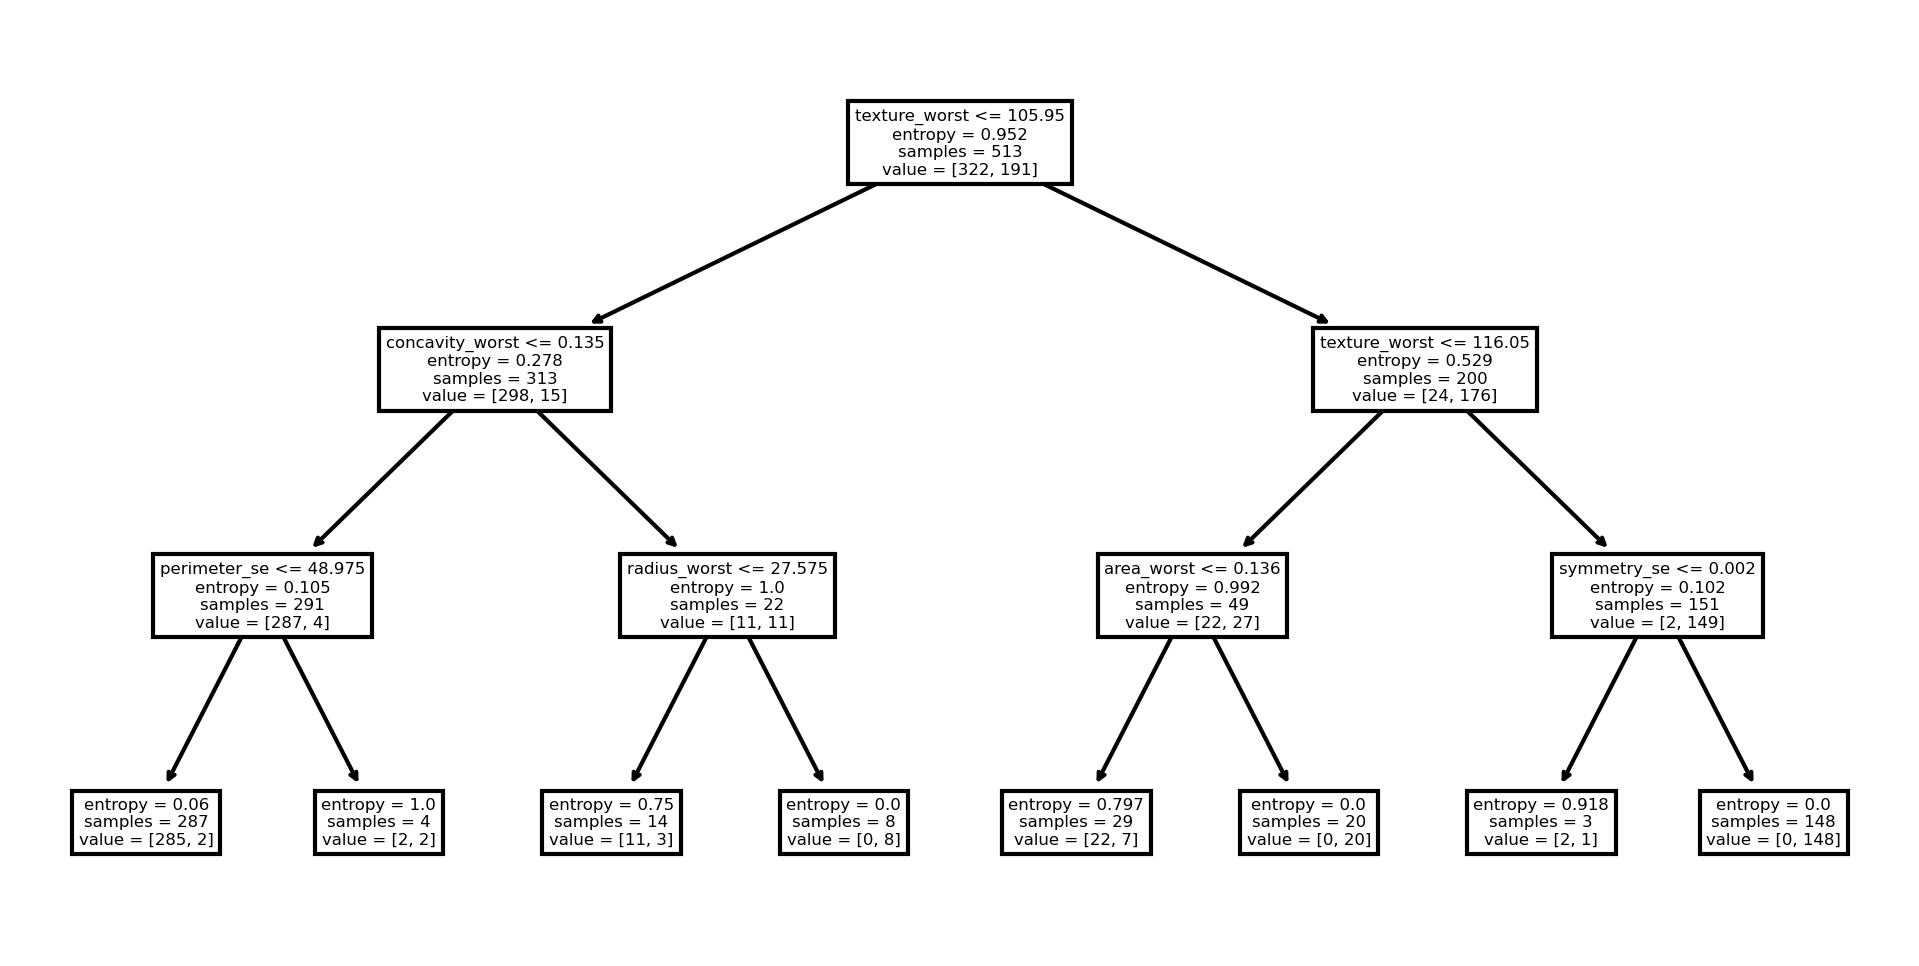

array(['B', 'M'], dtype=object)

In [165]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

classifier = DecisionTreeClassifier(max_depth=3, criterion="entropy")
classifier.fit(training.drop('diagnosis', axis=1), training['diagnosis'])
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,4), dpi=300)
plot_tree(classifier, feature_names=cancer.columns)
plt.show()
classifier.classes_

***Ex12.*** Using a stratified ksplitting with k=10, choose the best maximum depth (from 1 to 20). Plot a graph of the f1 score.

{'depth': 1, 'f1_score': 0.7567567567567568}
{'depth': 2, 'f1_score': 0.7567567567567568}
{'depth': 3, 'f1_score': 0.8571428571428572}
{'depth': 4, 'f1_score': 0.9090909090909091}
{'depth': 5, 'f1_score': 0.875}
{'depth': 6, 'f1_score': 0.875}
{'depth': 7, 'f1_score': 0.9361702127659575}
{'depth': 8, 'f1_score': 0.8936170212765958}
{'depth': 9, 'f1_score': 0.8936170212765958}
{'depth': 10, 'f1_score': 0.8936170212765958}
{'depth': 11, 'f1_score': 0.9333333333333332}
{'depth': 12, 'f1_score': 0.8979591836734693}
{'depth': 13, 'f1_score': 0.8979591836734693}
{'depth': 14, 'f1_score': 0.8979591836734693}
{'depth': 15, 'f1_score': 0.875}
{'depth': 16, 'f1_score': 0.9361702127659575}
{'depth': 17, 'f1_score': 0.9361702127659575}
{'depth': 18, 'f1_score': 0.875}
{'depth': 19, 'f1_score': 0.875}
{'depth': 20, 'f1_score': 0.875}
{'depth': 1, 'f1_score': 0.8780487804878049}
{'depth': 2, 'f1_score': 0.875}
{'depth': 3, 'f1_score': 0.9767441860465117}
{'depth': 4, 'f1_score': 0.9545454545454546}


{'depth': 18, 'f1_score': 0.975609756097561}
{'depth': 19, 'f1_score': 0.8947368421052632}
{'depth': 20, 'f1_score': 0.8947368421052632}


<AxesSubplot:xlabel='depth'>

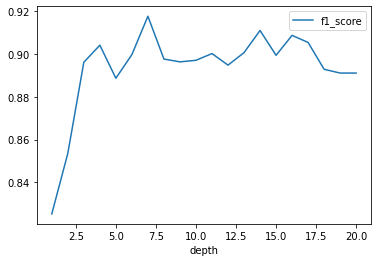

In [297]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True)
global_results = []

for train_index, test_index in skf.split(cancer, cancer['diagnosis']):
    local_performance = []
    for depth in range(1,21):
        training = cancer.iloc[train_index,:]
        testing = cancer.iloc[test_index,:]
        classifier = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
        classifier.fit(training.drop('diagnosis', axis=1), training['diagnosis'])
        pred = classifier.predict(testing.drop('diagnosis', axis=1))
        global_results.append({'depth':depth, 'f1_score':f1_score(testing[t], pred, pos_label='M')}) 
        print (global_results[-1])
pd.DataFrame(global_results).groupby('depth').mean().plot.line()